In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# 各パス指定

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'

# 分類数設定

In [3]:
NUM_CLASSES = 7

# 学習データ読み込み

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# モデル構築

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout (Dropout)            (None, 42)                0         
_________________________________________________________________
dense (Dense)                (None, 20)                860       
_________________________________________________________________
dropout_1 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_2 (Dense)              (None, 7)                 77        
Total params: 1,147
Trainable params: 1,147
Non-trainable params: 0
_________________________________________________________________


In [9]:
# モデルチェックポイントのコールバック
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# 早期打ち切り用コールバック
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# モデルコンパイル
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# モデル訓練

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
2/2 [==============================] - 3s 2s/step - loss: 1.9273 - accuracy: 0.1319 - val_loss: 1.9107 - val_accuracy: 0.2361

Epoch 00001: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 2/1000
2/2 [==============================] - 0s 47ms/step - loss: 1.9125 - accuracy: 0.1825 - val_loss: 1.9046 - val_accuracy: 0.2500

Epoch 00002: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 3/1000
2/2 [==============================] - 0s 46ms/step - loss: 1.8923 - accuracy: 0.1648 - val_loss: 1.8985 - val_accuracy: 0.2361

Epoch 00003: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 4/1000
2/2 [==============================] - 0s 48ms/step - loss: 1.8872 - accuracy: 0.2033 - val_loss: 1.8928 - val_accuracy: 0.2500

Epoch 00004: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 5/1000
2/2 [==============================] - 0s 45ms/step - loss: 1.8914 - accuracy: 0.2357 - val_loss: 1.8

2/2 [==============================] - 0s 47ms/step - loss: 1.7618 - accuracy: 0.3728 - val_loss: 1.7290 - val_accuracy: 0.5000

Epoch 00038: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 39/1000
2/2 [==============================] - 0s 49ms/step - loss: 1.7585 - accuracy: 0.3097 - val_loss: 1.7241 - val_accuracy: 0.5000

Epoch 00039: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 40/1000
2/2 [==============================] - 0s 48ms/step - loss: 1.7651 - accuracy: 0.3571 - val_loss: 1.7190 - val_accuracy: 0.5000

Epoch 00040: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 41/1000
2/2 [==============================] - 0s 49ms/step - loss: 1.7242 - accuracy: 0.3425 - val_loss: 1.7138 - val_accuracy: 0.5000

Epoch 00041: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 42/1000
2/2 [==============================] - 0s 62ms/step - loss: 1.7644 - accuracy: 0.3102 - val_loss: 1.7092 - v

Epoch 75/1000
2/2 [==============================] - 0s 48ms/step - loss: 1.6171 - accuracy: 0.3916 - val_loss: 1.5121 - val_accuracy: 0.5278

Epoch 00075: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 76/1000
2/2 [==============================] - 0s 46ms/step - loss: 1.6014 - accuracy: 0.4228 - val_loss: 1.5056 - val_accuracy: 0.5278

Epoch 00076: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 77/1000
2/2 [==============================] - 0s 47ms/step - loss: 1.6113 - accuracy: 0.3905 - val_loss: 1.4989 - val_accuracy: 0.5278

Epoch 00077: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 78/1000
2/2 [==============================] - 0s 46ms/step - loss: 1.6034 - accuracy: 0.3697 - val_loss: 1.4929 - val_accuracy: 0.5278

Epoch 00078: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 79/1000
2/2 [==============================] - 0s 46ms/step - loss: 1.6017 - accuracy: 0.3655 - val_lo

Epoch 112/1000
2/2 [==============================] - 0s 50ms/step - loss: 1.4644 - accuracy: 0.4474 - val_loss: 1.2695 - val_accuracy: 0.6250

Epoch 00112: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 113/1000
2/2 [==============================] - 0s 52ms/step - loss: 1.5061 - accuracy: 0.4082 - val_loss: 1.2634 - val_accuracy: 0.6250

Epoch 00113: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 114/1000
2/2 [==============================] - 0s 46ms/step - loss: 1.4503 - accuracy: 0.4448 - val_loss: 1.2570 - val_accuracy: 0.6528

Epoch 00114: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 115/1000
2/2 [==============================] - 0s 50ms/step - loss: 1.4425 - accuracy: 0.4724 - val_loss: 1.2510 - val_accuracy: 0.6528

Epoch 00115: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 116/1000
2/2 [==============================] - 0s 52ms/step - loss: 1.4117 - accuracy: 0.4604 - v


Epoch 00148: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 149/1000
2/2 [==============================] - 0s 43ms/step - loss: 1.3225 - accuracy: 0.4500 - val_loss: 1.0229 - val_accuracy: 0.8750

Epoch 00149: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 150/1000
2/2 [==============================] - 0s 46ms/step - loss: 1.2183 - accuracy: 0.5344 - val_loss: 1.0158 - val_accuracy: 0.8750

Epoch 00150: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 151/1000
2/2 [==============================] - 0s 46ms/step - loss: 1.3094 - accuracy: 0.5021 - val_loss: 1.0069 - val_accuracy: 0.8750

Epoch 00151: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 152/1000
2/2 [==============================] - 0s 48ms/step - loss: 1.3972 - accuracy: 0.4672 - val_loss: 0.9995 - val_accuracy: 0.8750

Epoch 00152: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 153/1000
2/2 [===

2/2 [==============================] - 0s 46ms/step - loss: 1.1047 - accuracy: 0.5589 - val_loss: 0.8218 - val_accuracy: 0.8750

Epoch 00185: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 186/1000
2/2 [==============================] - 0s 47ms/step - loss: 1.1823 - accuracy: 0.5417 - val_loss: 0.8175 - val_accuracy: 0.8750

Epoch 00186: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 187/1000
2/2 [==============================] - 0s 47ms/step - loss: 1.1423 - accuracy: 0.5912 - val_loss: 0.8136 - val_accuracy: 0.8750

Epoch 00187: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 188/1000
2/2 [==============================] - 0s 48ms/step - loss: 1.2206 - accuracy: 0.5318 - val_loss: 0.8105 - val_accuracy: 0.8750

Epoch 00188: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 189/1000
2/2 [==============================] - 0s 44ms/step - loss: 1.1649 - accuracy: 0.5918 - val_loss: 0.8074


Epoch 00221: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 222/1000
2/2 [==============================] - 0s 46ms/step - loss: 1.1427 - accuracy: 0.5172 - val_loss: 0.6984 - val_accuracy: 0.9028

Epoch 00222: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 223/1000
2/2 [==============================] - 0s 45ms/step - loss: 1.1090 - accuracy: 0.5746 - val_loss: 0.6943 - val_accuracy: 0.9028

Epoch 00223: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 224/1000
2/2 [==============================] - 0s 44ms/step - loss: 1.0428 - accuracy: 0.5777 - val_loss: 0.6904 - val_accuracy: 0.9028

Epoch 00224: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 225/1000
2/2 [==============================] - 0s 46ms/step - loss: 1.0472 - accuracy: 0.5839 - val_loss: 0.6865 - val_accuracy: 0.9028

Epoch 00225: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 226/1000
2/2 [===

2/2 [==============================] - 0s 43ms/step - loss: 0.9233 - accuracy: 0.6423 - val_loss: 0.6186 - val_accuracy: 0.9028

Epoch 00258: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 259/1000
2/2 [==============================] - 0s 47ms/step - loss: 1.0096 - accuracy: 0.6038 - val_loss: 0.6169 - val_accuracy: 0.9028

Epoch 00259: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 260/1000
2/2 [==============================] - 0s 47ms/step - loss: 1.0690 - accuracy: 0.5996 - val_loss: 0.6151 - val_accuracy: 0.9028

Epoch 00260: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 261/1000
2/2 [==============================] - 0s 48ms/step - loss: 1.0012 - accuracy: 0.6053 - val_loss: 0.6128 - val_accuracy: 0.9028

Epoch 00261: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 262/1000
2/2 [==============================] - 0s 47ms/step - loss: 0.9289 - accuracy: 0.6329 - val_loss: 0.6098

Epoch 295/1000
2/2 [==============================] - 0s 47ms/step - loss: 0.9511 - accuracy: 0.6517 - val_loss: 0.5550 - val_accuracy: 0.9028

Epoch 00295: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 296/1000
2/2 [==============================] - 0s 46ms/step - loss: 0.9560 - accuracy: 0.6486 - val_loss: 0.5552 - val_accuracy: 0.9028

Epoch 00296: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 297/1000
2/2 [==============================] - 0s 48ms/step - loss: 0.9149 - accuracy: 0.6512 - val_loss: 0.5546 - val_accuracy: 0.9028

Epoch 00297: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 298/1000
2/2 [==============================] - 0s 46ms/step - loss: 0.9224 - accuracy: 0.6444 - val_loss: 0.5537 - val_accuracy: 0.9028

Epoch 00298: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 299/1000
2/2 [==============================] - 0s 42ms/step - loss: 0.9705 - accuracy: 0.6116 - v


Epoch 00331: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 332/1000
2/2 [==============================] - 0s 46ms/step - loss: 1.0065 - accuracy: 0.5965 - val_loss: 0.5011 - val_accuracy: 0.9028

Epoch 00332: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 333/1000
2/2 [==============================] - 0s 46ms/step - loss: 0.9383 - accuracy: 0.6648 - val_loss: 0.5004 - val_accuracy: 0.9028

Epoch 00333: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 334/1000
2/2 [==============================] - 0s 44ms/step - loss: 0.9065 - accuracy: 0.6960 - val_loss: 0.4992 - val_accuracy: 0.9028

Epoch 00334: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 335/1000
2/2 [==============================] - 0s 43ms/step - loss: 0.8799 - accuracy: 0.6418 - val_loss: 0.4972 - val_accuracy: 0.9028

Epoch 00335: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 336/1000
2/2 [===

2/2 [==============================] - 0s 46ms/step - loss: 0.8434 - accuracy: 0.6793 - val_loss: 0.4713 - val_accuracy: 0.9028

Epoch 00368: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 369/1000
2/2 [==============================] - 0s 46ms/step - loss: 0.8614 - accuracy: 0.7033 - val_loss: 0.4699 - val_accuracy: 0.9028

Epoch 00369: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 370/1000
2/2 [==============================] - 0s 46ms/step - loss: 0.8841 - accuracy: 0.6538 - val_loss: 0.4686 - val_accuracy: 0.9028

Epoch 00370: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 371/1000
2/2 [==============================] - 0s 44ms/step - loss: 0.8095 - accuracy: 0.6960 - val_loss: 0.4666 - val_accuracy: 0.9028

Epoch 00371: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 372/1000
2/2 [==============================] - 0s 52ms/step - loss: 0.9629 - accuracy: 0.6340 - val_loss: 0.4656

Epoch 405/1000
2/2 [==============================] - 0s 47ms/step - loss: 0.8157 - accuracy: 0.7127 - val_loss: 0.4292 - val_accuracy: 0.9028

Epoch 00405: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 406/1000
2/2 [==============================] - 0s 47ms/step - loss: 0.8119 - accuracy: 0.7132 - val_loss: 0.4284 - val_accuracy: 0.9028

Epoch 00406: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 407/1000
2/2 [==============================] - 0s 46ms/step - loss: 0.9321 - accuracy: 0.6085 - val_loss: 0.4292 - val_accuracy: 0.9028

Epoch 00407: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 408/1000
2/2 [==============================] - 0s 48ms/step - loss: 0.8488 - accuracy: 0.7075 - val_loss: 0.4301 - val_accuracy: 0.9028

Epoch 00408: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 409/1000
2/2 [==============================] - 0s 48ms/step - loss: 0.8870 - accuracy: 0.6939 - v


Epoch 00441: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 442/1000
2/2 [==============================] - 0s 60ms/step - loss: 0.8360 - accuracy: 0.6788 - val_loss: 0.4126 - val_accuracy: 0.9167

Epoch 00442: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 443/1000
2/2 [==============================] - 0s 51ms/step - loss: 0.7991 - accuracy: 0.7185 - val_loss: 0.4110 - val_accuracy: 0.9167

Epoch 00443: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 444/1000
2/2 [==============================] - 0s 43ms/step - loss: 0.8166 - accuracy: 0.7164 - val_loss: 0.4089 - val_accuracy: 0.9167

Epoch 00444: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 445/1000
2/2 [==============================] - 0s 48ms/step - loss: 0.7752 - accuracy: 0.7127 - val_loss: 0.4071 - val_accuracy: 0.9167

Epoch 00445: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 446/1000
2/2 [===

2/2 [==============================] - 0s 46ms/step - loss: 0.7714 - accuracy: 0.7101 - val_loss: 0.3923 - val_accuracy: 0.9167

Epoch 00478: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
Epoch 00478: early stopping


In [12]:
# モデル評価
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

1/1 [==============================] - 0s 19ms/step - loss: 0.3923 - accuracy: 0.9167


In [13]:
# 保存したモデルのロード
model = tf.keras.models.load_model(model_save_path)

In [14]:
# 推論テスト
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

[9.5841950e-01 2.2219287e-02 5.1757659e-05 2.8890015e-03 6.8059727e-03
 9.5984815e-03 1.6048109e-05]
0


# 混同行列

Matplotlib is building the font cache; this may take a moment.


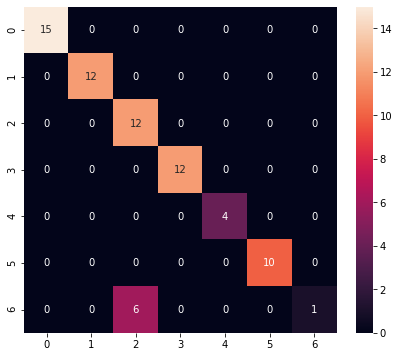

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        12
           2       0.67      1.00      0.80        12
           3       1.00      1.00      1.00        12
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00        10
           6       1.00      0.14      0.25         7

    accuracy                           0.92        72
   macro avg       0.95      0.88      0.86        72
weighted avg       0.94      0.92      0.89        72



In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite用のモデルへ変換

In [16]:
# 推論専用のモデルとして保存
model.save(model_save_path, include_optimizer=False)

In [17]:
# モデルを変換(量子化)
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\kibas\AppData\Local\Temp\tmplqsgky81\assets


6496

# 推論テスト

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [19]:
# 入出力テンソルを取得
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time
# 推論実施
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

Wall time: 0 ns


In [22]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[9.5841950e-01 2.2219276e-02 5.1757608e-05 2.8890015e-03 6.8059699e-03
 9.5984768e-03 1.6048109e-05]
0
